### Análise Exploratória 
[Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

#### Importando os dados

In [98]:
# Importando as bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt

In [99]:
# Carregando o dataset
data = pd.read_csv('jobs_in_data.csv')

In [100]:
print(f'{data.shape[0]} linhas e {data.shape[1]} colunas')

9355 linhas e 12 colunas


In [101]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number) ou dados duplicados.

In [102]:
data.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [103]:
data.duplicated().sum()

4014

- Removendo dados duplicados e resetando o índice

In [104]:
data = data.drop_duplicates()

In [105]:
data = data.reset_index(drop=True)

- Removendo colunas que não vão ser utilizadas

In [106]:
data = data.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'])

- Convertendo o tipo de dado das colunas

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         5341 non-null   int64 
 1   job_title         5341 non-null   object
 2   job_category      5341 non-null   object
 3   salary_in_usd     5341 non-null   int64 
 4   experience_level  5341 non-null   object
 5   employment_type   5341 non-null   object
 6   work_setting      5341 non-null   object
 7   company_size      5341 non-null   object
dtypes: int64(2), object(6)
memory usage: 333.9+ KB


In [108]:
# Dados categóricos economizam memória e facilitam nas análises
colunas = ['job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
data[colunas] = data[colunas].astype('category')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         5341 non-null   int64   
 1   job_title         5341 non-null   object  
 2   job_category      5341 non-null   category
 3   salary_in_usd     5341 non-null   int64   
 4   experience_level  5341 non-null   category
 5   employment_type   5341 non-null   category
 6   work_setting      5341 non-null   category
 7   company_size      5341 non-null   category
dtypes: category(5), int64(2), object(1)
memory usage: 152.4+ KB


#### Resumindo os dados

In [110]:
data.head(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M


In [111]:
resumo_categoria = data['job_category'].value_counts().reset_index(name='quantidade')
resumo_categoria

,job_category,quantidade
0,Data Science and Research,1655
1,Data Engineering,1160
2,Machine Learning and AI,917
3,Data Analysis,809
4,Leadership and Management,351
5,BI and Visualization,188
6,Data Architecture and Modeling,162
7,Data Management and Strategy,49
8,Data Quality and Operations,45
9,Cloud and Database,5


In [112]:
resumo_exp = data['experience_level'].value_counts().reset_index(name='quantidade')
resumo_exp

,experience_level,quantidade
0,Senior,3444
1,Mid-level,1274
2,Entry-level,400
3,Executive,223


- Exibindo os resultados em subplots com matplotlib

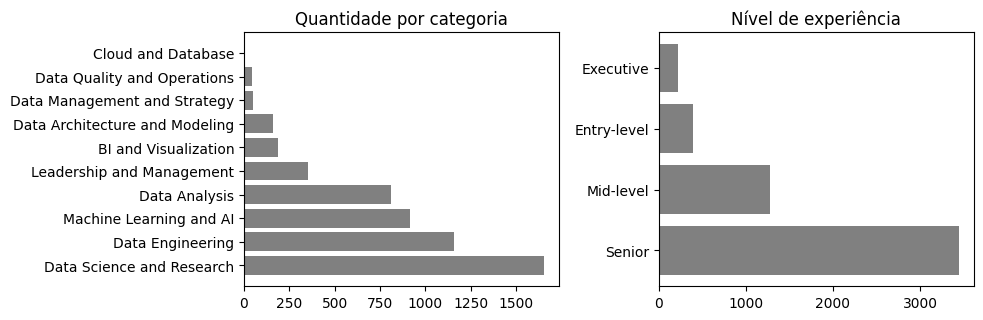

In [113]:
plt.figure(figsize=(10, 6)) # Definindo o tamanho da imagem

plt.subplot(2, 2, 1)
plt.barh(resumo_categoria['job_category'], resumo_categoria['quantidade'], color='gray')
plt.title('Quantidade por categoria')

plt.subplot(2, 2, 2)
plt.barh(resumo_exp['experience_level'], resumo_exp['quantidade'], color='gray')
plt.title('Nível de experiência')

plt.tight_layout() # Ajustando o tamanho

#### Operações de grupo e visualizações

- Utilizando `groupby` para agrupar os dados

In [114]:
# Resumindo os dados pelo ano, categoria e contando o número de ocorrências
group = data.groupby(['work_year', 'job_category']).size().reset_index(name='quantidade')

/tmp/ipykernel_4418/3082329248.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = data.groupby(['work_year', 'job_category']).size().reset_index(name='quantidade')


- Reformatando os dados e transformando em uma Tabela Dinâmica com `pivot_table`
- Utilizando a Tabela como base e gerando um gráfico de barras horizontais

In [115]:
# Preenchendo os valores ausentes com fillna e transformando em inteiros
categoria_ano = group.pivot_table(index='job_category', columns='work_year').fillna(0).astype(int)

# Acrescentando Totais Gerais na tabela e ordenando os dados
categoria_ano['Total'] = categoria_ano.sum(axis=1)
categoria_ano = categoria_ano.sort_values(by='Total', ascending=False)

/tmp/ipykernel_4418/358105645.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  categoria_ano = group.pivot_table(index='job_category', columns='work_year').fillna(0).astype(int)


In [116]:
# Formatando e centralizando a tabela dinâmica
categoria_ano.style.set_properties(**{'text-align': 'center'})

In [117]:
# Removendo a coluna de Total para plotar o gráfico
categoria_ano = categoria_ano.drop('Total', axis=1)

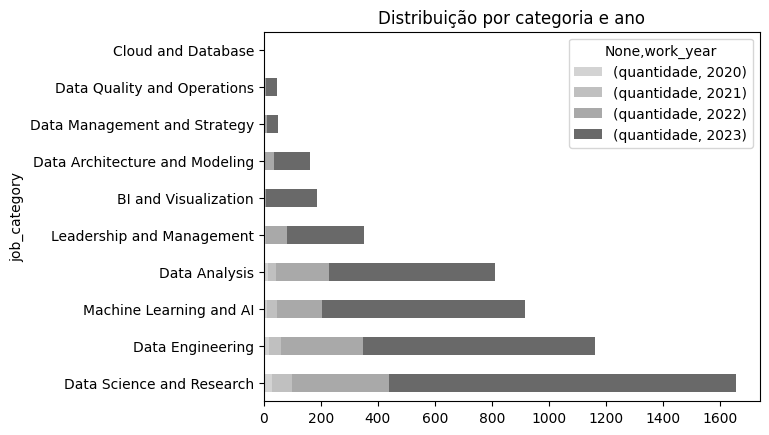

In [118]:
# Definindo as cores a serem usadas
cores = ['lightgray', 'silver', 'darkgray', 'dimgray']

# Plotando um gráfico de barras empilhadas
categoria_ano.plot.barh(stacked=True, color=cores)
plt.title('Distribuição por categoria e ano')
plt.show()

##### Distribuição das vagas por categoria e nível de experiência

In [119]:
# Resumindo os dados pela categoria, nível de experiência e contando o número de ocorrências
group2 = data.groupby(['job_category', 'experience_level']).size().reset_index(name='quantidade')

/tmp/ipykernel_4418/2652047528.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group2 = data.groupby(['job_category', 'experience_level']).size().reset_index(name='quantidade')


In [120]:
group2.tail(2)

,job_category,experience_level,quantidade
38,Machine Learning and AI,Mid-level,201
39,Machine Learning and AI,Senior,639


In [121]:
# Transformando os dados com pivot_table
categoria_exp = group2.pivot_table(index='job_category', columns='experience_level')

# Somando os totais das linhas para transformar em percentual
soma_linhas = categoria_exp.sum(axis=1)
categoria_exp = (categoria_exp.div(soma_linhas, axis=0) * 100)

/tmp/ipykernel_4418/3059193160.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  categoria_exp = group2.pivot_table(index='job_category', columns='experience_level')


In [122]:
# Formatando e centralizando a tabela dinâmica
categoria_exp.style.set_properties(**{'text-align': 'center'})

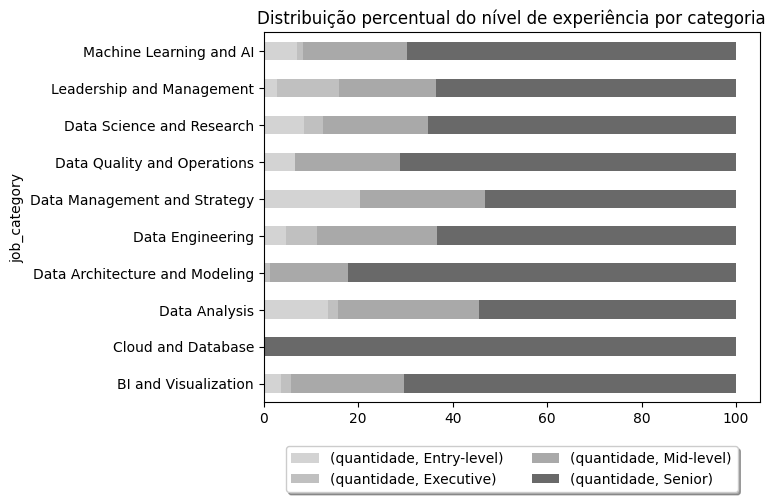

In [123]:
categoria_exp.plot.barh(stacked=True, color=cores)
plt.title('Distribuição percentual do nível de experiência por categoria')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()

##### Média salarial anual por categoria / título / nível de experiência
- Quantidade de vagas e média salarial anual por categoria de trabalho em Data Science

In [124]:
# Agrupando os dados por categoria e realizando cálculos com agg
media_categoria = data.groupby(['job_category']).agg({'job_category': 'size', 'salary_in_usd': 'mean'})

# Renomando as colunas da tabela
media_categoria = media_categoria.rename(columns={'job_category': 'quantidade', 'salary_in_usd': 'média anual'})

# Ordenando os dados pela médial salarial anual
media_categoria = media_categoria.sort_values(by='média anual', ascending=False)

/tmp/ipykernel_4418/3638325641.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_categoria = data.groupby(['job_category']).agg({'job_category': 'size', 'salary_in_usd': 'mean'})


In [125]:
# Centralizando e formatando a tabela
media_categoria.style.set_properties(**{'text-align': 'center'})

,quantidade,média anual
job_category,,
Machine Learning and AI,917,170453.221374
Data Science and Research,1655,157131.039879
Data Architecture and Modeling,162,157054.006173
Cloud and Database,5,155000.000000
Leadership and Management,351,149020.108262
Data Engineering,1160,142967.543103
BI and Visualization,188,128377.734043
Data Management and Strategy,49,107655.836735
Data Analysis,809,106707.058096


In [126]:
# Agrupando os dados por titulo e realizando cálculos com agg
media_titulo = data.groupby(['job_title']).agg({'job_title': 'size', 'salary_in_usd': 'mean'})

# Renomando as colunas da tabela
media_titulo = media_titulo.rename(columns={'job_title': 'quantidade', 'salary_in_usd': 'média anual'})

# Ordenando os dados pela médial salarial anual
media_titulo = media_titulo.sort_values(by='média anual', ascending=False)

In [127]:
media_titulo = media_titulo[:10] # Definindo somente os 10 primeiros

- Top 10 vagas com a maior média salarial anual

In [128]:
# Centralizando e formatando a tabela
media_titulo.style.set_properties(**{'text-align': 'center'})

,quantidade,média anual
job_title,,
Analytics Engineering Manager,1,399880.000000
Data Science Tech Lead,1,375000.000000
Managing Director Data Science,1,300000.000000
Head of Machine Learning,2,259000.000000
AWS Data Architect,1,258000.000000
Cloud Data Architect,1,250000.000000
AI Architect,6,233656.000000
Director of Data Science,27,215447.629630
Machine Learning Software Engineer,13,212907.692308


In [129]:
# Agrupando os dados por nível de experiência e categoria, calculando uma média salarial anual
media_exp = data.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()

# Selecionando somente valores existentes
media_exp = media_exp[media_exp['salary_in_usd'] > 0]
media_exp = media_exp.sort_values(by='salary_in_usd', ascending=False)

/tmp/ipykernel_4418/473553112.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_exp = data.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()


In [130]:
media_exp.tail(3)

,experience_level,job_title,salary_in_usd
61,Entry-level,Data Quality Engineer,23753.0
37,Entry-level,Data Analytics Engineer,20000.0
247,Executive,Staff Data Analyst,15000.0


In [131]:
# Transformando em uma Tabela Dinâmica e substituindo os valores vazios
media_exp = media_exp.pivot_table(index='job_title', columns='experience_level').fillna('-')

/tmp/ipykernel_4418/866389943.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  media_exp = media_exp.pivot_table(index='job_title', columns='experience_level').fillna('-')


In [132]:
media_exp = media_exp[:10] # Resumindo somente os 10 primeiros

- Visualizando o nível de experiência exigido e média salarial anual

In [133]:
media_exp.style.set_properties(**{'text-align': 'center'})